<a href="https://colab.research.google.com/github/Mishranitin96/Board-Infinity-Homework/blob/master/Assignment_2_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

In [1]:
import matplotlib.pyplot as plt

In [45]:
NM =pd.read_csv('/content/playstore-analysis_(2)_(1)[1].csv')

In [46]:
NM

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Tasks
1. Data clean up – Missing value treatment

a. Drop records where rating is missing since rating is our target/study variable

In [30]:
NM = NM.dropna(subset =['Rating'] )
NM.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

b. Check the null values for the Android Ver column. 

i. Are all 3 records having the same problem?


In [31]:
print("Checking for Null values in Android ver \n")
SH =pd.isnull(NM['Android Ver'])

Checking for Null values in Android ver 



In [32]:
NM[SH]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


ii. Drop the 3rd record i.e. record for “Life Made WIFI …”


In [47]:
print("Droping the 3rd record")
NM.drop([8450],inplace=True)

Droping the 3rd record


In [35]:
NM.mode()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,FAMILY,4.4,2,21516.529524,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up


In [36]:
print("Checking for Null values in Android Ver is ",NM['Android Ver'].isnull().sum())

Checking for Null values in Android Ver is  2


iii. Replace remaining missing values with the mode


In [48]:
print("Replace remaining missing values with the mode in Android Version")
print('________________________________________________________________________')
NM['Android Ver'].fillna(NM['Android Ver'].mode()[0],inplace=True)
print(NM.isnull().sum())
print('________________________________________________________________________')
print("No null Values in Android Ver Coloumn")

Replace remaining missing values with the mode in Android Version
________________________________________________________________________
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64
________________________________________________________________________
No null Values in Android Ver Coloumn


In [38]:
print("Checking for null values in Current Ver")
ST=pd.isnull(NM['Current Ver'])

Checking for null values in Current Ver


In [39]:
ST

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Name: Current Ver, Length: 9365, dtype: bool

c. Current ver – replace with most common value


In [42]:
print("Checking for null values in Current Ver")
c=pd.isnull(NM['Current Ver'])
NM[c]

Checking for null values in Current Ver


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?


In [43]:
print(" Review, Installs, Price columns can be in Numeric Type")

 Review, Installs, Price columns can be in Numeric Type


b. Price variable – remove $ sign and convert to float

c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

d. Convert all other identified columns to numeric


In [49]:
NM['Price'] = NM['Price'].str.strip("$")
NM['Installs'] = NM['Installs'].str.replace('\W',"")
NM['Price']=pd.to_numeric(NM['Price'],errors='coerce')
NM['Reviews']=pd.to_numeric(NM['Reviews'],errors='coerce')
NM['Size']=pd.to_numeric(NM['Size'],errors='coerce')

In [51]:
NM.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8014,Morse Player,FAMILY,5.0,12.0,2400.000000,100,Paid,1.99,Everyone,Education,"January 23, 2017",2.1.1,3.0 and up
3951,BIGO LIVE - Live Stream,SOCIAL,4.4,2349421.0,39000.000000,100000000,Free,0.00,Teen,Social,"July 27, 2018",4.1.0,4.0 and up
7205,Ultra CE calculator,SPORTS,4.2,28.0,7300.000000,1000,Free,0.00,Everyone,Sports,"June 17, 2018",1.52,4.0.3 and up
9880,EU Mobile Money Partenaire Commercial,FINANCE,4.3,70.0,3900.000000,10000,Free,0.00,Everyone,Finance,"May 14, 2018",1.3,4.0.3 and up
3989,CppDroid - C/C++ IDE,FAMILY,4.1,29978.0,21516.529524,1000000,Free,0.00,Everyone,Education,"August 17, 2017",Varies with device,Varies with device
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392.0,21516.529524,1000000,Free,0.00,Everyone,Shopping,"August 8, 2018",Varies with device,Varies with device
2383,Davis's Drug Guide,MEDICAL,3.9,272.0,6400.000000,50000,Free,0.00,Everyone,Medical,"December 11, 2017",2.7.36,4.1 and up
7643,Them Bombs: co-op board game play with 2-4 fri...,GAME,4.7,8038.0,52000.000000,100000,Free,0.00,Teen,Board,"July 12, 2018",1.4.1,4.1 and up
9454,Bad Piggies HD,FAMILY,4.4,764967.0,69000.000000,10000000,Free,0.00,Everyone,Puzzle,"July 5, 2018",2.3.4,4.1 and up
8500,Transport DK,MAPS_AND_NAVIGATION,4.1,204.0,11000.000000,10000,Free,0.00,Everyone,Maps & Navigation,"May 29, 2017",2.28,4.0 and up


3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [52]:
NM=NM[NM['Rating'].between(1,5)]
print("As there is value between (1,5)\n",NM["Rating"])

As there is value between (1,5)
 0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9365, dtype: float64


b. Reviews should not be more than installs as only those who installed can review the app.

i. Are there any such records? Drop if so.

In [54]:
NM['Installs']=NM['Installs'].apply(pd.to_numeric,downcast='integer')
NM=NM[NM['Reviews'] < NM['Installs']]

fg =pd.DataFrame(NM[['App','Reviews','Installs']])
print(fg)

                                                     App   Reviews  Installs
0         Photo Editor & Candy Camera & Grid & ScrapBook     159.0     10000
1                                    Coloring book moana     967.0    500000
2      U Launcher Lite – FREE Live Cool Themes, Hide ...   87510.0   5000000
3                                  Sketch - Draw & Paint  215644.0  50000000
4                  Pixel Draw - Number Art Coloring Book     967.0    100000
...                                                  ...       ...       ...
10834                                      FR Calculator       7.0       500
10836                                   Sya9a Maroc - FR      38.0      5000
10837                   Fr. Mike Schmitz Audio Teachings       4.0       100
10839                      The SCP Foundation DB fr nn5n     114.0      1000
10840      iHoroscope - 2018 Daily Horoscope & Astrology  398307.0  10000000

[9356 rows x 3 columns]


4. Identify and handle outliers –

a. Price column

i. Make suitable plot to identify outliers in price

Ploting Boxplot graph for Price column


<function matplotlib.pyplot.show>

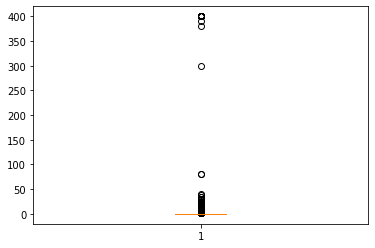

In [55]:
print("Ploting Boxplot graph for Price column")

plt.boxplot(NM['Price'])
plt.show

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [56]:
NM=NM[NM['Price']<200]
print("MaxPrice is $", NM['Price'].max())

MaxPrice is $ 79.99


iii. After dropping the useless records, make the suitable plot again to identify outliers

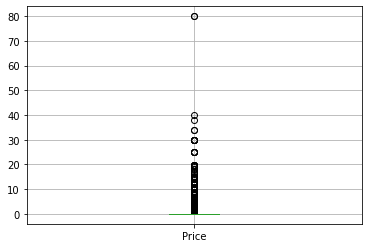

In [57]:
NM.boxplot(column="Price")

iv. Limit data to records with price < $30


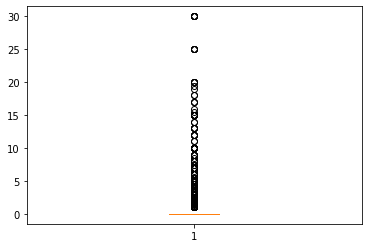

In [58]:
NM=NM[NM['Price']<30]
plt.boxplot(NM['Price']);

b. Reviews column

i. Make suitable plot

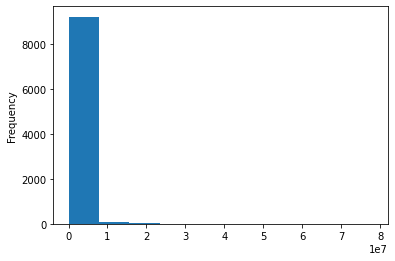

In [59]:
NM['Reviews'].plot(kind='hist');

ii. Limit data to apps with < 1 Million reviews


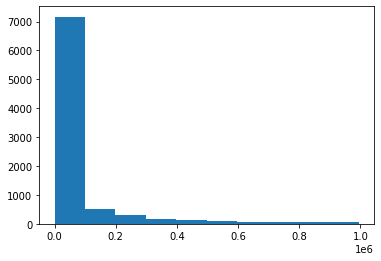

In [60]:
NM=NM[NM['Reviews']<1000000]
plt.hist(NM["Reviews"]);

c. Installs

i. What is the 95th percentile of the installs?

In [61]:
pt=NM['Installs'].quantile(.95)
print("95Percentile of Installs column is ",pt)

95Percentile of Installs column is  10000000.0


ii. Drop records having a value more than the 95th percentile


In [62]:
NM=NM[NM['Installs']<pt]

**Data analysis to answer business questions**


5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

a. How do you explain this?

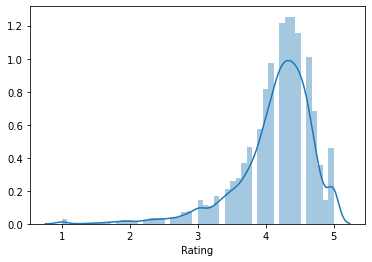

In [63]:
sns.distplot(NM["Rating"]);

In [64]:
print("As we can see that Ratings are  more gathered between 3 & 5")

As we can see that Ratings are  more gathered between 3 & 5


6. What are the top Content Rating values?

a. Are there any values with very few records?

In [65]:
NM['Content Rating'].value_counts()

Everyone           5911
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

b. If yes, drop those as they won’t help in the analysis


In [66]:
NM = NM[NM['Content Rating'] != 'Unrated']
NM = NM[NM['Content Rating'] != 'Adults only 18+']
NM.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,5911,5911,5911,5911,5911,5911,5911,5911,5911,5911,5907,5911
Everyone 10+,249,249,249,249,249,249,249,249,249,249,249,249
Mature 17+,346,346,346,346,346,346,346,346,346,346,346,346
Teen,746,746,746,746,746,746,746,746,746,746,746,746


7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

<Figure size 1080x576 with 0 Axes>

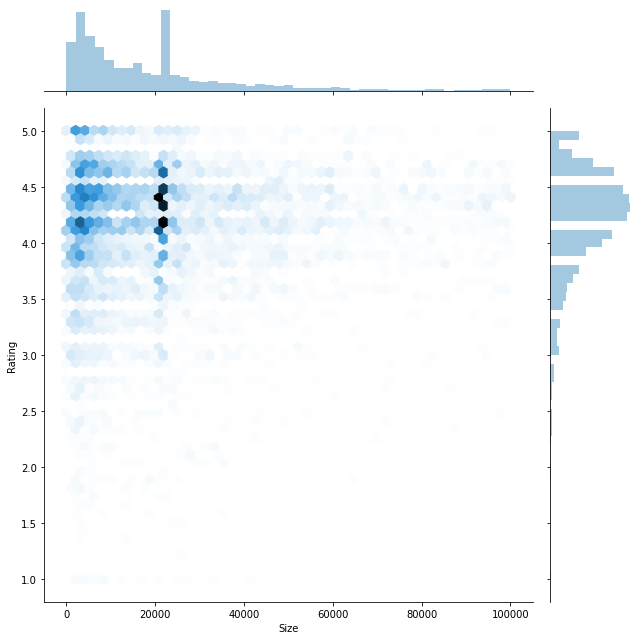

In [67]:
plt.figure(figsize=(15,8))
sns.jointplot("Size", "Rating", data=NM,height=9,kind='hex');

**b. Do you see any patterns?**

YES, we an see some types of scatter patterns in graph

**c. How do you explain the pattern?**

we can get conclusion from graph that Higest Rating for the moderate size of app is from 4 to 5.00 ratings

8. Effect of price on rating

  a. Make a jointplot (with regression line)

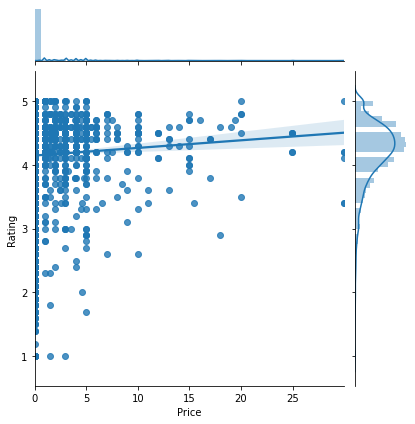

In [68]:
sns.jointplot(x="Price", y="Rating", data=NM, kind="reg");

b. What pattern do you see?

As we can see that play store has most apps in the rating of 3.5 to 5

c. How do you explain the pattern?

As i can say the pattern that are seen in above graph are imaginable as play store has its own functionality to verify the ratings standards

**d. Replot the data, this time with only records with price > 0 **

In [70]:
RePrice=NM.loc[NM.Price>0]
RePrice

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,21516.529524,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468.0,36000.000000,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5.0,861.000000,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2400.000000,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252.0,11000.000000,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


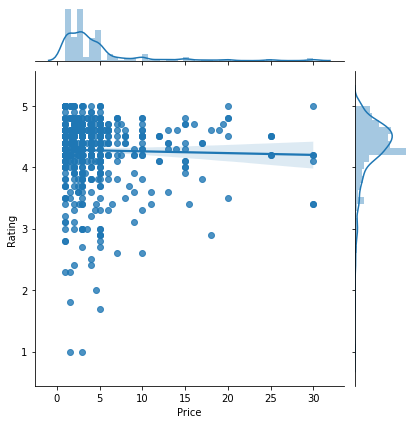

In [71]:
sns.jointplot(x="Price", y="Rating", data=RePrice, kind="reg");

9. Look at all the numeric interactions together – 

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'


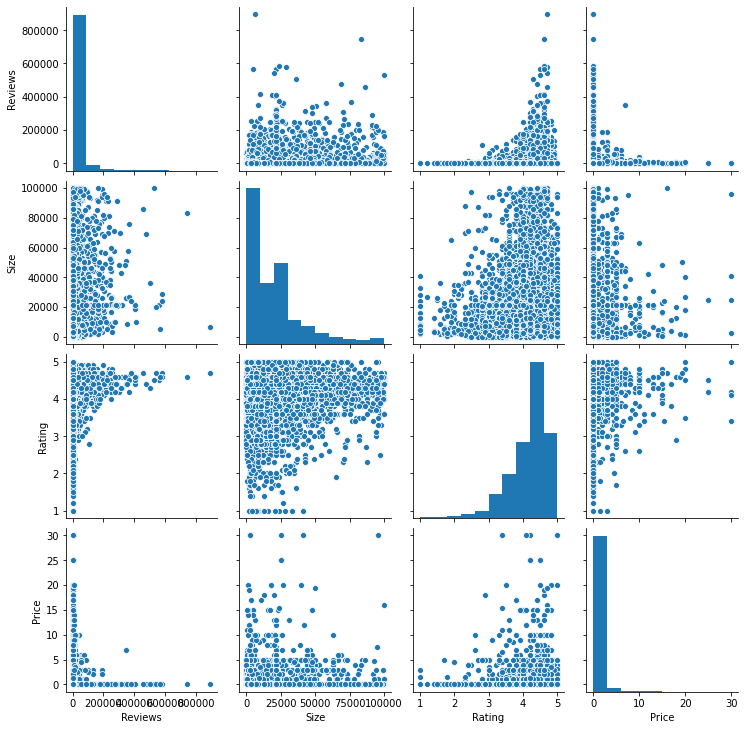

In [72]:
sns.pairplot(NM, vars=["Reviews","Size","Rating","Price"]);

10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

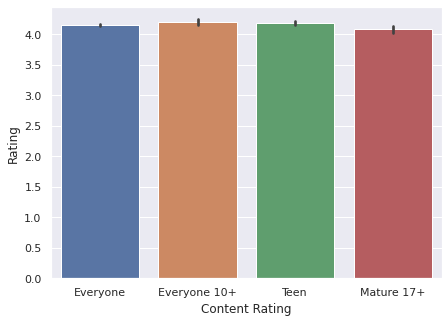

In [76]:
plt.subplots(figsize = (7,5))
sns.set(style="darkgrid")
sns.barplot('Content Rating','Rating',data=NM);

In [77]:
NM.describe()


,Rating,Reviews,Size,Installs,Price
count,7252.000000,7252.000000,7252.000000,7.252000e+03,7252.000000
mean,4.149697,19237.717457,20398.385435,7.935981e+05,0.386695
std,0.561870,47779.718017,20312.998783,1.483392e+06,1.882806
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,3.900000,85.000000,5300.000000,1.000000e+04,0.000000
50%,4.300000,1383.000000,15000.000000,1.000000e+05,0.000000
75%,4.500000,16392.000000,26000.000000,1.000000e+06,0.000000
max,5.000000,896118.000000,100000.000000,5.000000e+06,29.990000


c. Choose the right metric and plot


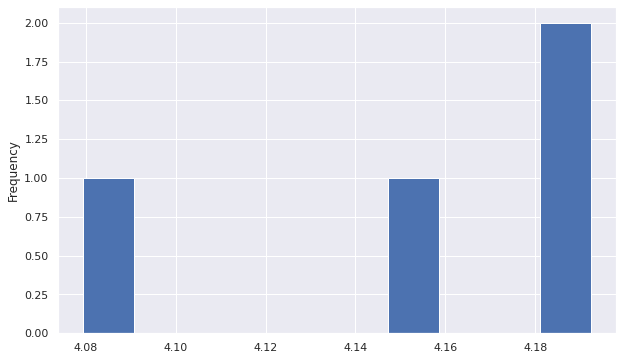

In [79]:
plt.figure(figsize=(10,6))
S=NM.groupby('Content Rating')['Rating'].mean()
S.plot(kind='hist')

11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

In [80]:
pd.qcut(NM['Size'],q=5)

0         (9800.0, 21516.53]
1         (9800.0, 21516.53]
2           (4100.0, 9800.0]
4            (8.499, 4100.0]
5           (4100.0, 9800.0]
                ...         
10833        (8.499, 4100.0]
10834        (8.499, 4100.0]
10836    (31000.0, 100000.0]
10837        (8.499, 4100.0]
10839     (9800.0, 21516.53]
Name: Size, Length: 7252, dtype: category
Categories (5, interval[float64]): [(8.499, 4100.0] < (4100.0, 9800.0] < (9800.0, 21516.53] <
                                    (21516.53, 31000.0] < (31000.0, 100000.0]]

b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination

In [81]:
np.array_split(NM, 5)

[                                                    App  ...   Android Ver
 0        Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
 1                                   Coloring book moana  ...  4.0.3 and up
 2     U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
 4                 Pixel Draw - Number Art Coloring Book  ...    4.4 and up
 5                            Paper flowers instructions  ...    2.3 and up
 ...                                                 ...  ...           ...
 2220                       DisneyNOW – TV Shows & Games  ...    4.4 and up
 2221                     Ever After High™ Charmed Style  ...  4.0.3 and up
 2224                    Learn to Read with Tommy Turtle  ...    2.3 and up
 2227                         Thomas & Friends: Race On!  ...    4.4 and up
 2228                                           Mad Libs  ...    6.0 and up
 
 [1451 rows x 13 columns],
                              App             Category  ...

c. Make a heatmap of this

As i have not got training in heatmap so i wasn't able to do this 